Student Performance Indicator


Life Cycle of Machine Learning Project

1) Understanding Problem Statement
2) Data Collection
3) Data Checks to Perform
4) Explaoratory Data analysis
5) Data pre-preocessing
6) Model Training
7) Choose Best Model

1) Problem statement

This project understands how the students performance(test's score) is affected by other variables such as Gender, Ethinicity, Parental Level of Education, Lunch and Test preparation course.

2) Data Collection
    This data consists of 8 columns and 1000 rows.

    2.1) Importing Pandas, Numpy, Matplotlib, Seaborn and Warnings Library.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

  2.2)  Import the CSV data as Pandas DataFrame

In [3]:
df=pd.read_csv('data/stud.csv')

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.shape

(1000, 8)

In [6]:
df['parental_level_of_education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

2.3) DataSet Information


  1) gender-> sex of students-> male/female
  2) race/ethnicity -> ethincity of students ->(Group A,B,C,D,E)
  3) parental level of education-> parent's final education-> (bachelor's degree", 'some college', "master's degree","associate's degree", 'high school', 'some high school')
  4) lunch-> having lunch before the test(standard or free/reduced)
  5) test_preparation_course-> complete or not complete before the test
  6) math score
  7) reading score
  8) writing score

3) Data Checks to Perform


  
  1) Checking Missing Values
  2) Checking Duplicates 
  3) Checking Data Type
  4) Checking the number of unique values in each column
  5) Check statistics of data set
  6) Checking various categories present in the different categorical columns

3.1) Check Missing Value

In [8]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

Obs-> There is no missing values

3.2) Check Duplicates

In [10]:
df.duplicated().sum()

0

No Duplicates

3.3) Check Data Types

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


3.4) Checking the number of unique values of each column

In [14]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

3.5) Check Statistics of Data Set

In [15]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Insight

    .From above description of numerical data, all means are very close to each other - between 66 and 69.2
    .All Standard Deviations are also close - between 14.6 and 15.2 
    .While there is a minimum score of 0 in maths, for writing minimum is much higher = 10 and for reading it is highest = 17 

3.7) Exploring Data

In [18]:
print("Categories in gender")
print(df['gender'].unique(),"\n")

print("Categories in race")
print(df['race_ethnicity'].unique(),"\n")

print("Categories in Parental level of Education")
print(df['parental_level_of_education'].unique(),"\n")

print("Categories in lunch")
print(df['lunch'].unique(),"\n")

print("Categories in test preparation")
print(df['test_preparation_course'].unique(),"\n")

Categories in gender
['female' 'male'] 

Categories in race
['group B' 'group C' 'group A' 'group D' 'group E'] 

Categories in Parental level of Education
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school'] 

Categories in lunch
['standard' 'free/reduced'] 

Categories in test preparation
['none' 'completed'] 



In [22]:
##define numerical and categorical features
numerical_features=[feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features=[feature for feature in df.columns if df[feature].dtype == 'O']

print("Nmerical Features: ",numerical_features)
print("Categorical Features: ",categorical_features)

Nmerical Features:  ['math_score', 'reading_score', 'writing_score']
Categorical Features:  ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


3.8) Adding columns for total score and average score

In [24]:
df['total_score']=df['math_score']+df['reading_score']+df['writing_score']
df['average_score']=df['total_score']/3

In [25]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [32]:
reading_full=df[df['reading_score'] == 100]['average_score'].count()
writing_full=df[df['writing_score'] == 100]['average_score'].count()
math_full=df[df['math_score'] == 100]['average_score'].count()

print(f"Number of students with full marks in maths: {math_full}")
print(f"Number of students with full marks in reading: {reading_full}")
print(f"Number of students with full marks in writing: {writing_full}")

Number of students with full marks in maths: 7
Number of students with full marks in reading: 17
Number of students with full marks in writing: 14


In [33]:
reading_less_20=df[df['reading_score'] <= 20]['average_score'].count()
writing_less_20=df[df['writing_score'] <= 20]['average_score'].count()
math_less_20=df[df['math_score'] <= 20]['average_score'].count()

print(f"Number of students with less than 20 marks in maths: {math_less_20}")
print(f"Number of students with less than 20 marks in reading: {reading_less_20}")
print(f"Number of students with less than 20 marks in writing: {writing_less_20}")

Number of students with less than 20 marks in maths: 4
Number of students with less than 20 marks in reading: 1
Number of students with less than 20 marks in writing: 3


Insights

  From the above values we get students have performed worst in maths
  
  Best performance is in reading section

4) Exploring Data(Visualization)

4.1) Visualize average score distribution to make some conclusion

  .Histogram

  .KDE(Kernel Distribution Function)

4.11) Histogram And KDE

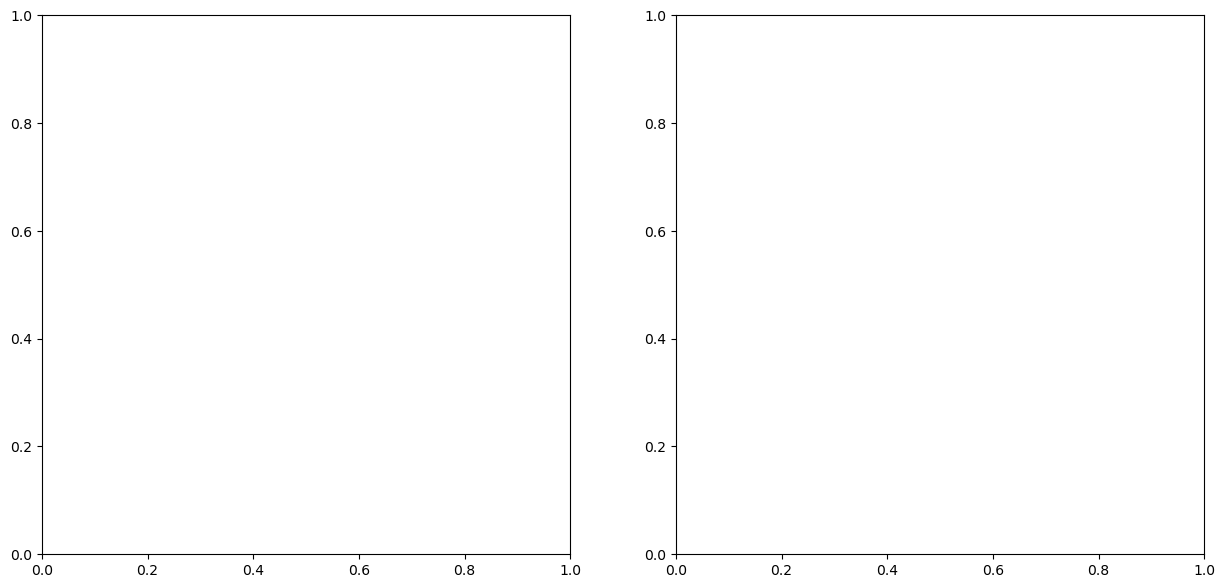

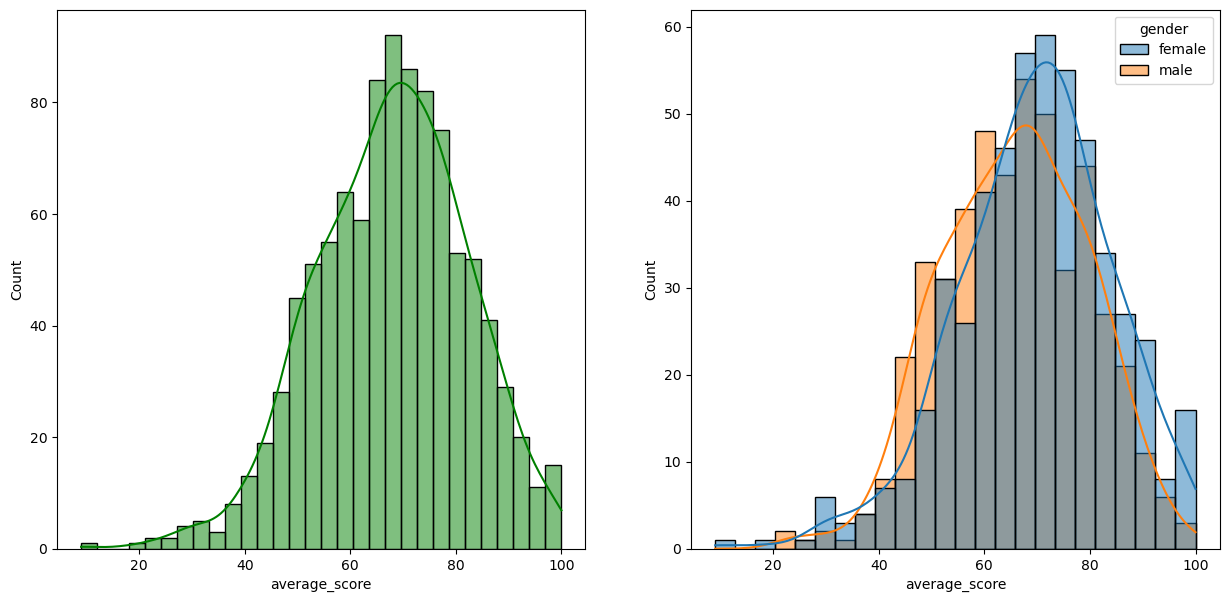

In [42]:
fig, axs= plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average_score',kde=True,hue='gender')
plt.show()

Insight

  Female Student tends to perfrom well than male students

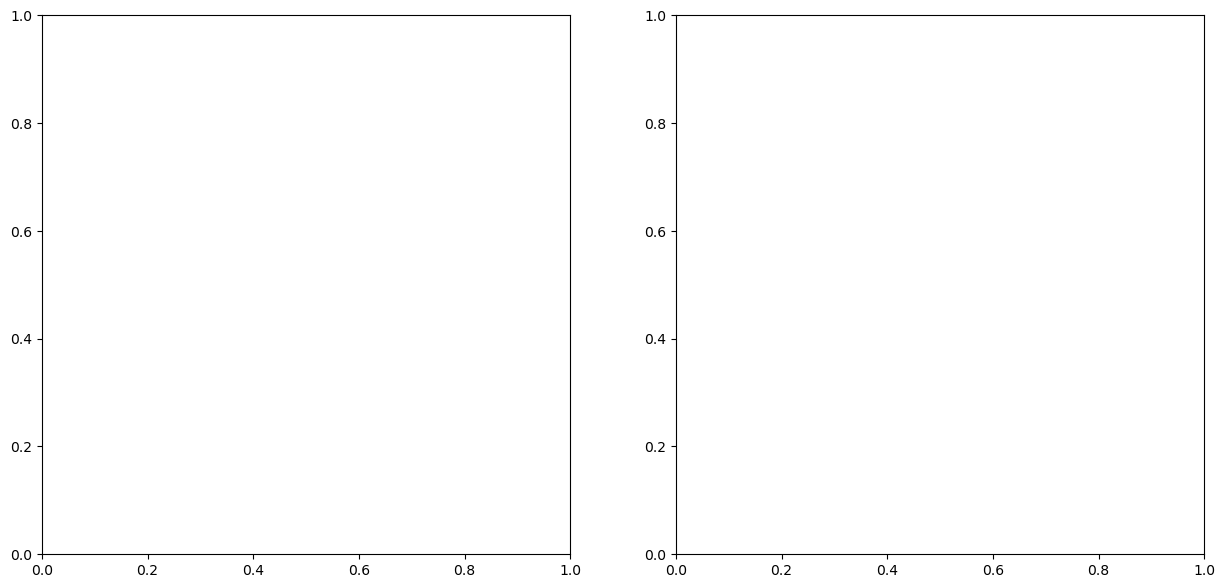

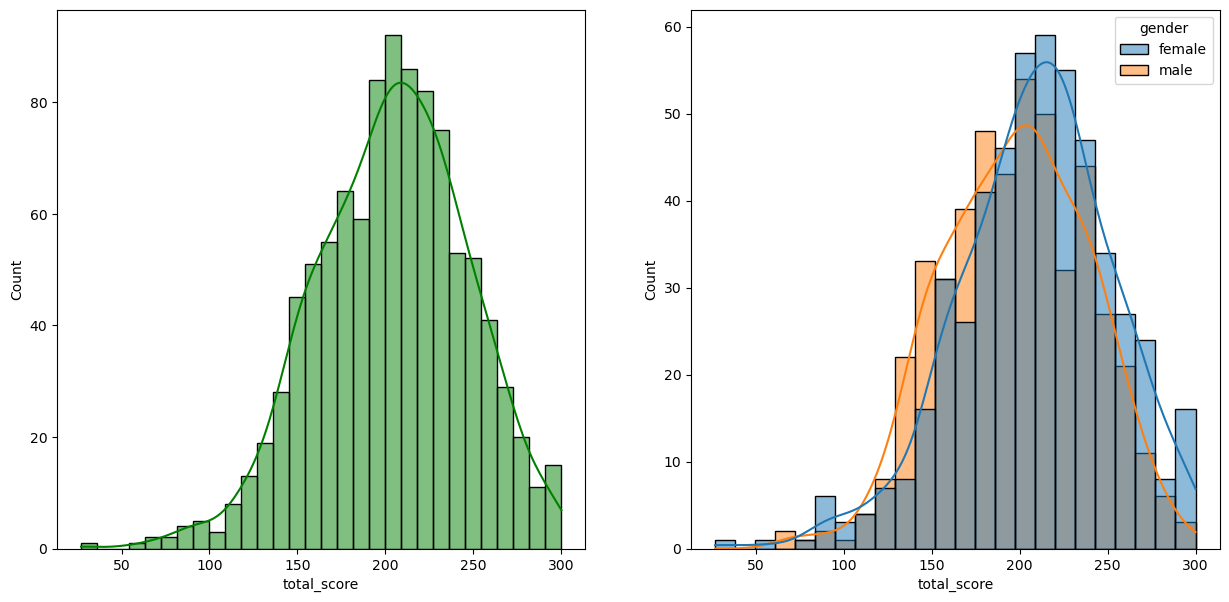

In [44]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='total_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total_score',kde=True,hue='gender')
plt.show()

#####  Insights
- Female students tend to perform well then male students.

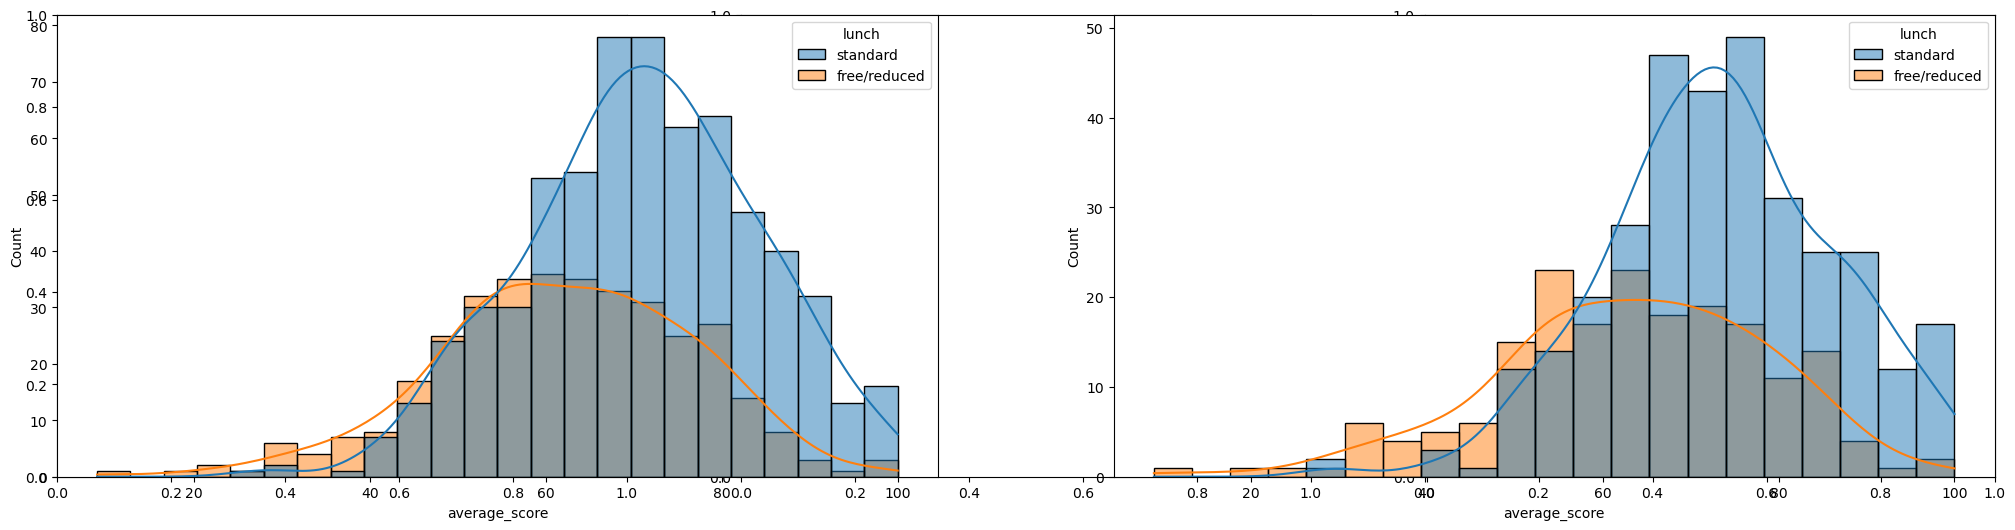

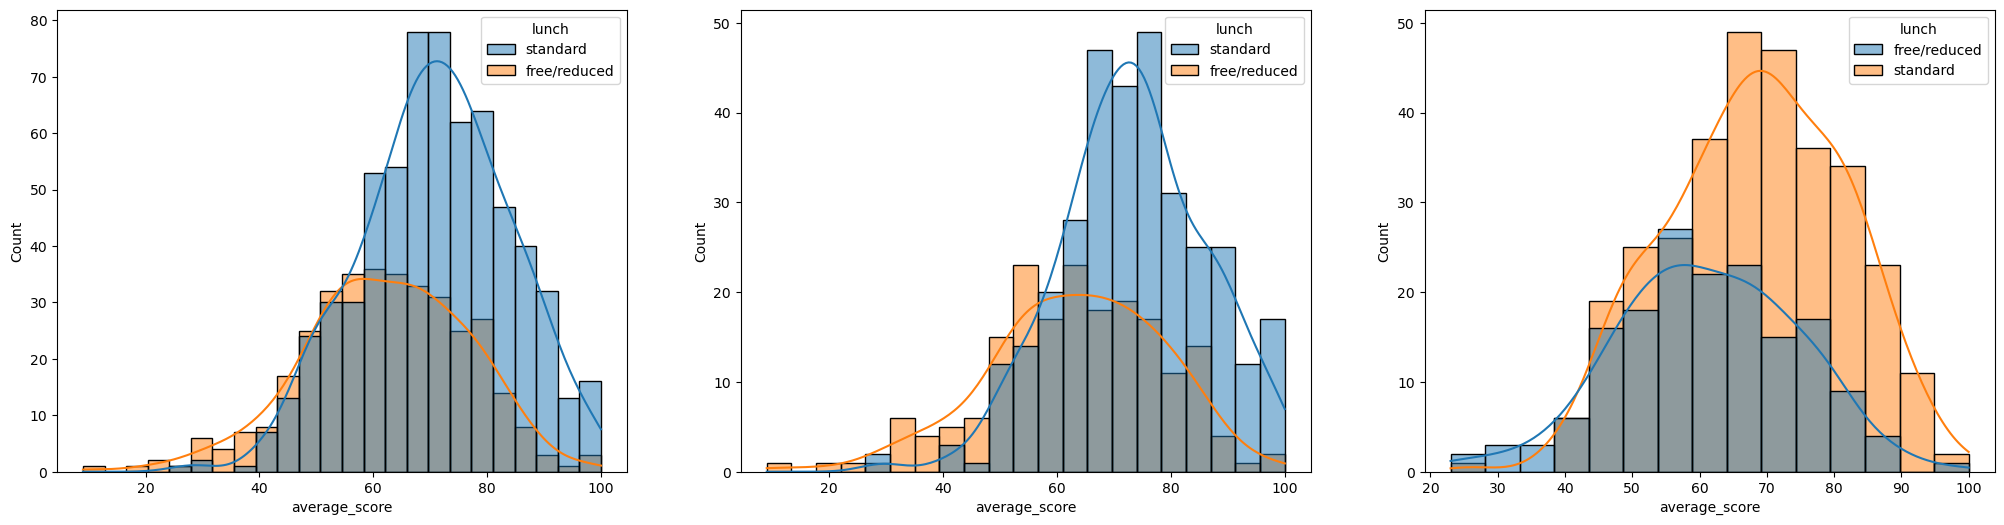

In [53]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x='average_score',kde=True,hue='lunch')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'],x='average_score',kde=True,hue='lunch')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'],x='average_score',kde=True,hue='lunch')
plt.show()

#####  Insights
- Standard lunch helps perform well in exams.
- Standard lunch helps perform well in exams be it a male or a female.

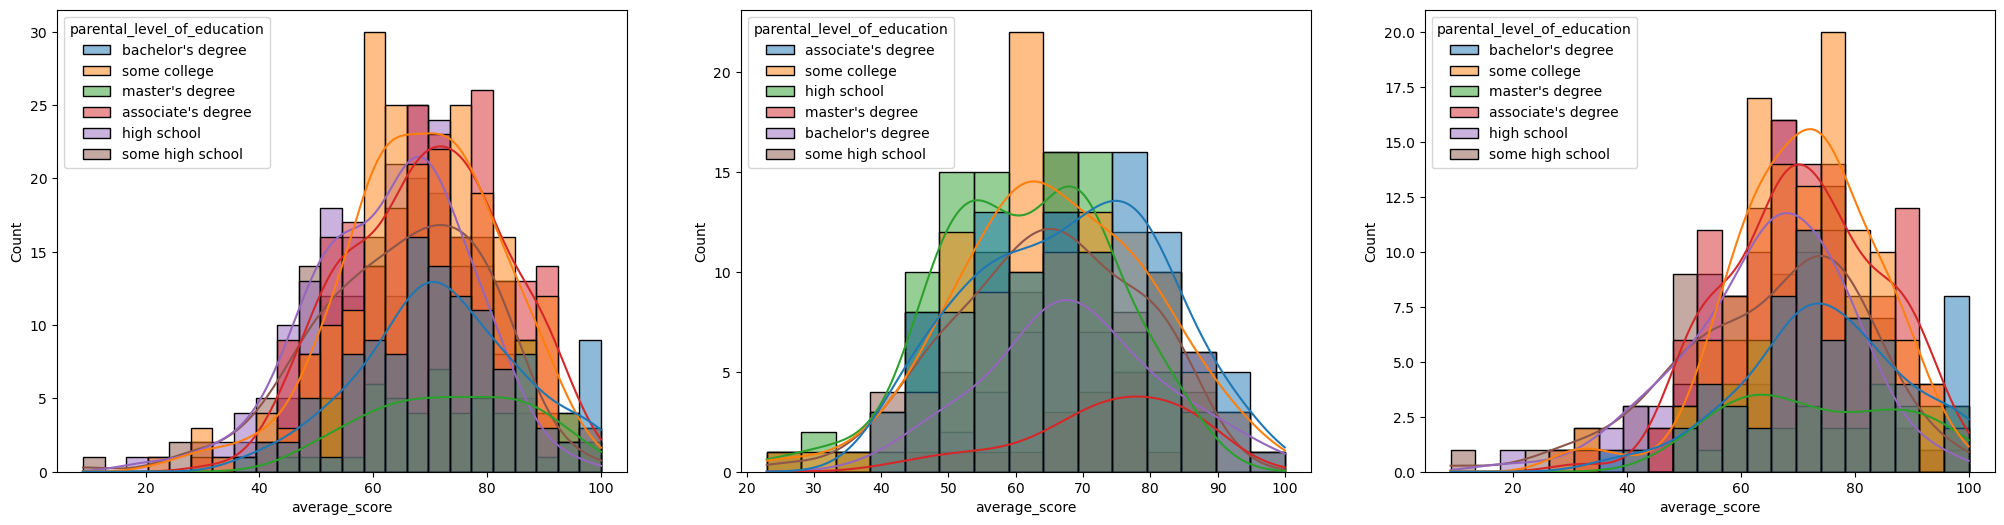

In [54]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
ax =sns.histplot(data=df,x='average_score',kde=True,hue='parental_level_of_education')
plt.subplot(132)
ax =sns.histplot(data=df[df.gender=='male'],x='average_score',kde=True,hue='parental_level_of_education')
plt.subplot(133)
ax =sns.histplot(data=df[df.gender=='female'],x='average_score',kde=True,hue='parental_level_of_education')
plt.show()

#####  Insights
- In general parent's education don't help student perform well in exam.
- 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
- 3rd plot we can see there is no effect of parent's education on female students.